In [1]:
using DataFrames
using CSV
using Statistics
using Plots

In [2]:
df = DataFrame(CSV.File("/Users/williamallen/Dropbox/org/trty_vs_managed.csv"))
first(df, 6)

,Trty,Managed,diff,%diff,div
,Float64,Float64,Float64,Float64,Float64
1,49978.9,5.00502e5,-713.67,-0.142591,0.0
2,49817.6,497665.0,511.01,0.102682,0.0
3,49519.6,4.91898e5,3298.16,0.670497,0.0
4,49656.3,4.94734e5,1828.85,0.369663,0.0
5,50122.2,4.98783e5,2439.16,0.489022,0.0
6,50206.6,498193.0,3873.38,0.777486,0.0


In [3]:
df.adj_div=accumulate(+, df.div.*10)
df.adj_trty=df.Trty.*10 .+ df.adj_div
last(df, 6)
function returns(d)
    len=length(d)-1
    fst=first(d, len)
    100*(last(d, len) .- fst) ./ fst
end
function ret(d)
    fl=[first(d,1);last(d,1)]
    first(returns(fl))
end
risk_free_rate=1.0
function sharpe(d, std_rets)
    (ret(d)-risk_free_rate)/std_rets
end
function least_squares(xs, ys)
    meanx = mean(xs)
    meany = mean(ys)
    slope=cov(xs, ys)/var(xs)
    inter=meany-slope*meanx
    (inter, slope)
end
function residuals(xs, ys, inter, slope)
    (ys.-inter).+slope.*xs
end
function coef_of_determination(ys, res)
    1-var(res)/var(ys)
end

function r_squared(xs, ys)
    (inter, slope)=least_squares(xs, ys)
    res=residuals(xs, ys, inter, slope)
    coef_of_determination(ys, res)
end
function fit_line(inter, slope, xs)
    inter.+(slope.*xs)
end

fit_line (generic function with 1 method)

In [4]:
rets_managed=returns(df.Managed)
rets_trty=returns(df.adj_trty)
std_rets_managed=std(rets_managed; corrected=false)
std_rets_trty=std(rets_trty; corrected=false)
sharpe_trty=sharpe(df.adj_trty, std_rets_trty)
sharpe_managed=sharpe(df.Managed, std_rets_managed)
ret_managed=ret(df.Managed)
ret_trty=ret(df.adj_trty)

4.469007708856216

In [14]:
names=["Return", "Std.Dev", "Sharpe Ratio", "Cur. Value"]
managed_line=[ret_managed, std_rets_managed, sharpe_managed, last(df.Managed)]
trty_line=[ret_trty, std_rets_trty, sharpe_trty, last(df.adj_trty)]
diff_line=trty_line .-managed_line
res_df=DataFrame(Name=names, Trty=trty_line, Managed=managed_line, Diff=diff_line)
permutedims(res_df, 1)

,Name,Return,Std.Dev,Sharpe Ratio,Cur. Value
,String,Float64,Float64,Float64,Float64
1,Trty,4.46901,1.31853,2.63096,5.22124e5
2,Managed,1.52673,0.582143,0.904818,5.08144e5
3,Diff,2.94227,0.73639,1.72614,13980.6


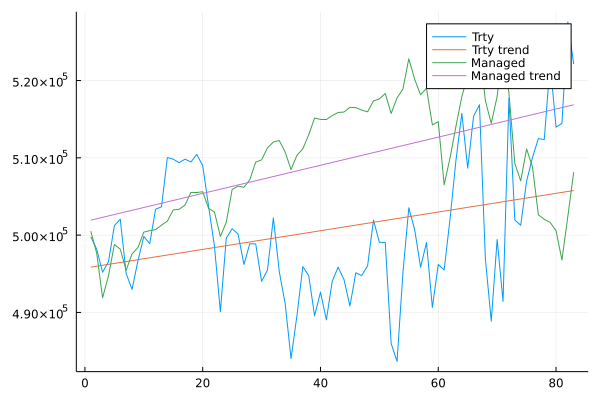

In [13]:
xs=0:length(df.adj_trty)-1
(managed_inter, managed_slope)=least_squares(xs, df.Managed)
(trty_inter, trty_slope)=least_squares(xs, df.adj_trty)
plot(df.adj_trty, label="Trty")
plot!(fit_line(trty_inter, trty_slope, xs), label="Trty trend")
plot!(df.Managed, label="Managed")
plot!(fit_line(managed_inter, managed_slope, xs), label="Managed trend")

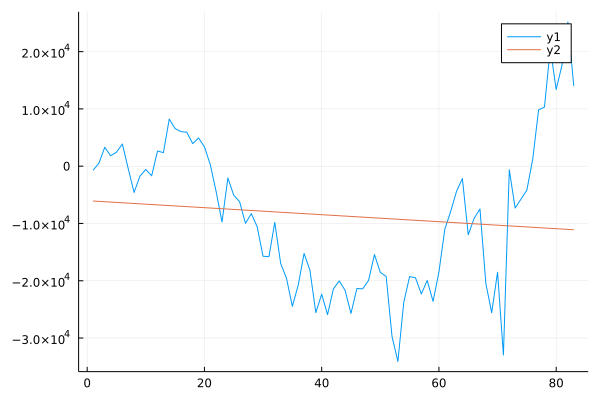

In [7]:
diffs=df.adj_trty.-df.Managed
xs=0:length(diffs)-1
(inter, slope)=least_squares(xs, diffs)
plot([diffs, fit_line(inter, slope, xs)])

In [8]:
r_squared(df.adj_trty, df.Managed)

-0.07858259266877332

In [9]:
?

search:  ] [ = $ ; ( @ { " ) ? . } ⊽ ⊼ ⊻ ⊋ ⊊ ⊉ ⊈ ⊇ ⊆ ≥ ≤ ≢ ≡ ≠ ≉ ≈ ∪ ∩ ∛ √ ∘ ∌ ∋



**Welcome to Julia 1.7.2.** The full manual is available at

```
https://docs.julialang.org
```

as well as many great tutorials and learning resources:

```
https://julialang.org/learning/
```

For help on a specific function or macro, type `?` followed by its name, e.g. `?cos`, or `?@time`, and press enter. Type `;` to enter shell mode, `]` to enter package mode.
